In [1]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
from pyspark.sql.functions import col, expr, lit, min, max, mean

In [2]:
spark = SparkSession.builder\
    .config("spark.jars", "duckdb.jar") \
    .getOrCreate()

24/04/24 18:30:36 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


In [12]:
DF = spark.read \
    .format("jdbc") \
    .option("url", "jdbc:duckdb:trusted_zone/freshdata_trusted.db") \
    .option("driver", "org.duckdb.DuckDBDriver") \
    .option("query", '''
        SELECT b.Price_Escalat
        FROM rent_price b
        WHERE b.Year > 2014
        AND b."Average _rent" = 'average rent (euro/month)'
    ''') \
    .load()


In [3]:
barris = spark.read \
    .format("jdbc") \
    .option("url", "jdbc:duckdb:trusted_zone/freshdata_trusted.db") \
    .option("driver", "org.duckdb.DuckDBDriver") \
    .option("query", '''
        SELECT DISTINCT b.Neighbourhood 
        FROM rent_price b 
        WHERE b."Average _rent" = 'average rent (euro/month)'
    ''') \
    .load()

In [ ]:
b

In [90]:
DF.show()

+------+
| Price|
+------+
|605.28|
| 618.8|
|624.78|
|647.14|
|616.05|
|627.86|
| 701.0|
|658.42|
|664.66|
|681.39|
| 740.5|
|740.28|
|737.27|
|780.27|
|812.48|
|806.56|
|802.64|
|811.74|
|856.57|
|834.64|
+------+
only showing top 20 rows



In [93]:
data = []

for barri in barris:
    DF = spark.read \
        .format("jdbc") \
        .option("url", "jdbc:duckdb:trusted_zone/freshdata_trusted.db") \
        .option("driver", "org.duckdb.DuckDBDriver") \
        .option("query", f'''
            SELECT b.Price AS Price_"{barri}"
            FROM rent_price b 
            WHERE b.Neighbourhood = "{barri}"
            AND b."Average _rent" = 'average rent (euro/month)'
            ORDER BY Year, Trimester
        ''') \
        .load()
    data.append(DF)

Py4JJavaError: An error occurred while calling o307.load.
: java.sql.SQLException: java.sql.SQLException: Parser Error: syntax error at or near ""la Dreta de l'Eixample""
	at org.duckdb.DuckDBPreparedStatement.prepare(DuckDBPreparedStatement.java:122)
	at org.duckdb.DuckDBPreparedStatement.<init>(DuckDBPreparedStatement.java:76)
	at org.duckdb.DuckDBConnection.prepareStatement(DuckDBConnection.java:76)
	at org.duckdb.DuckDBConnection.prepareStatement(DuckDBConnection.java:188)
	at org.apache.spark.sql.execution.datasources.jdbc.JDBCRDD$.getQueryOutputSchema(JDBCRDD.scala:65)
	at org.apache.spark.sql.execution.datasources.jdbc.JDBCRDD$.resolveTable(JDBCRDD.scala:58)
	at org.apache.spark.sql.execution.datasources.jdbc.JDBCRelation$.getSchema(JDBCRelation.scala:241)
	at org.apache.spark.sql.execution.datasources.jdbc.JdbcRelationProvider.createRelation(JdbcRelationProvider.scala:37)
	at org.apache.spark.sql.execution.datasources.DataSource.resolveRelation(DataSource.scala:346)
	at org.apache.spark.sql.DataFrameReader.loadV1Source(DataFrameReader.scala:229)
	at org.apache.spark.sql.DataFrameReader.$anonfun$load$2(DataFrameReader.scala:211)
	at scala.Option.getOrElse(Option.scala:189)
	at org.apache.spark.sql.DataFrameReader.load(DataFrameReader.scala:211)
	at org.apache.spark.sql.DataFrameReader.load(DataFrameReader.scala:172)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.lang.Thread.run(Thread.java:750)
Caused by: java.sql.SQLException: Parser Error: syntax error at or near ""la Dreta de l'Eixample""
	at org.duckdb.DuckDBNative.duckdb_jdbc_prepare(Native Method)
	at org.duckdb.DuckDBPreparedStatement.prepare(DuckDBPreparedStatement.java:116)
	... 24 more


In [4]:
barris = [i[0] for i in barris.collect()]

In [5]:
barris

['Gothic_Quarter',
 'Sants_-_Badal',
 'les_Corts',
 'Sarria',
 'Sant_Gervasi_-_la_Bonanova',
 'Can_Baro',
 'la_Teixonera',
 'el_Turo_de_la_Peira',
 'Navas',
 'el_Besos_i_el_Maresme',
 'la_Verneda_i_la_Pau',
 'Baro_de_Viver',
 'la_Sagrada_Familia',
 'la_Nova_Esquerra_de_l_Eixample',
 'el_Poble_Sec',
 'Vallcarca_i_els_Penitents',
 'Montbau',
 'Vilapicina_i_la_Torre_Llobeta',
 'la_Prosperitat',
 'Ciutat_Meridiana',
 'el_Poblenou',
 'Vallbona',
 'Sant_Pere__Santa_Caterina_i_la_Ribera',
 'l_Antiga_Esquerra_de_l_Eixample',
 'Sants',
 'Pedralbes',
 'el_Carmel',
 'la_Trinitat_Vella',
 'el_Congres_i_els_Indians',
 'el_Clot',
 'Sagrada_Familia',
 'Sant_Antoni',
 'la_Maternitat_i_Sant_Ramon',
 'Vallvidrera__el_Tibidabo_i_les_Planes',
 'el_Putxet_i_el_Farro',
 'la_Font_d_en_Fargues',
 'la_Vall_d_Hebron',
 'Can_Peguera',
 'Canyelles',
 'Verdun',
 'el_Parc_i_la_Llacuna_del_Poblenou',
 'Diagonal_Mar_i_el_Front_Maritim_del_Poblenou',
 'Provencals_del_Poblenou',
 'Sant_Marti_de_Provencals',
 'la_Marina

In [83]:
columnas_sql = ', '.join([
    f"MAX(CASE WHEN b.Neighbourhood = '{barrio}' THEN b.Price ELSE NULL END) AS \"{barrio}_Price\""
    for barrio in barris
])

# Consulta SQL completa
sql_query = f"""
    SELECT {columnas_sql}
    FROM rent_price b
    WHERE b."Average_rent" = 'average rent (euro/month)'
    GROUP BY b.Year, b.Trimester
    ORDER BY b.Year, b.Trimester;
    """


In [86]:
sql_query[0]

'\n'

In [80]:
DF = spark.read \
    .format("jdbc") \
    .option("url", "jdbc:duckdb:trusted_zone/freshdata_trusted.db") \
    .option("driver", "org.duckdb.DuckDBDriver") \
    .option("query", sql_query) \
    .load()

Py4JJavaError: An error occurred while calling o272.load.
: java.sql.SQLException: java.sql.SQLException: Parser Error: syntax error at or near "Eixample"
	at org.duckdb.DuckDBPreparedStatement.prepare(DuckDBPreparedStatement.java:122)
	at org.duckdb.DuckDBPreparedStatement.<init>(DuckDBPreparedStatement.java:76)
	at org.duckdb.DuckDBConnection.prepareStatement(DuckDBConnection.java:76)
	at org.duckdb.DuckDBConnection.prepareStatement(DuckDBConnection.java:188)
	at org.apache.spark.sql.execution.datasources.jdbc.JDBCRDD$.getQueryOutputSchema(JDBCRDD.scala:65)
	at org.apache.spark.sql.execution.datasources.jdbc.JDBCRDD$.resolveTable(JDBCRDD.scala:58)
	at org.apache.spark.sql.execution.datasources.jdbc.JDBCRelation$.getSchema(JDBCRelation.scala:241)
	at org.apache.spark.sql.execution.datasources.jdbc.JdbcRelationProvider.createRelation(JdbcRelationProvider.scala:37)
	at org.apache.spark.sql.execution.datasources.DataSource.resolveRelation(DataSource.scala:346)
	at org.apache.spark.sql.DataFrameReader.loadV1Source(DataFrameReader.scala:229)
	at org.apache.spark.sql.DataFrameReader.$anonfun$load$2(DataFrameReader.scala:211)
	at scala.Option.getOrElse(Option.scala:189)
	at org.apache.spark.sql.DataFrameReader.load(DataFrameReader.scala:211)
	at org.apache.spark.sql.DataFrameReader.load(DataFrameReader.scala:172)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.lang.Thread.run(Thread.java:750)
Caused by: java.sql.SQLException: Parser Error: syntax error at or near "Eixample"
	at org.duckdb.DuckDBNative.duckdb_jdbc_prepare(Native Method)
	at org.duckdb.DuckDBPreparedStatement.prepare(DuckDBPreparedStatement.java:116)
	... 24 more


In [43]:
data = [i[0] for i in DF.collect()]

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=276.856, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=277.721, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=277.499, Time=0.01 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=276.914, Time=0.00 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=279.497, Time=0.01 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.052 seconds
Predicción del siguiente valor: 822.65
Error RMSE en conjunto de prueba: 22.70


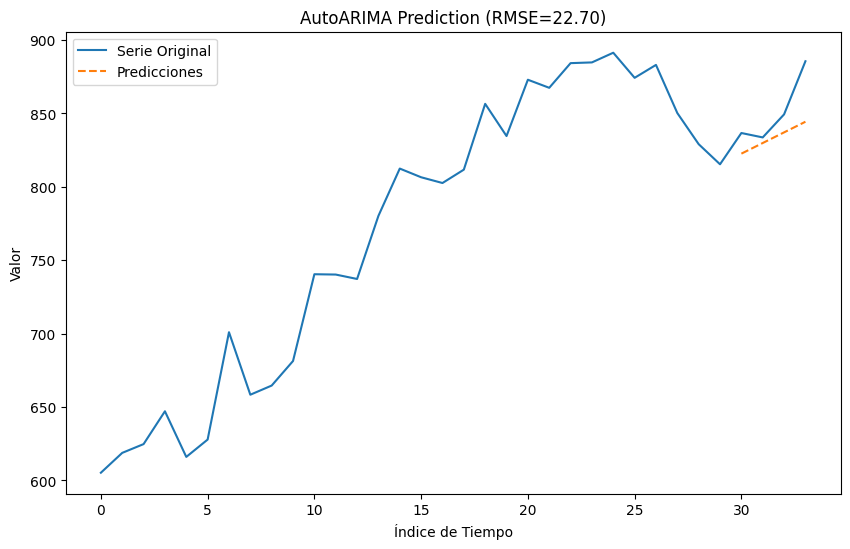

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error

# Datos de la serie temporal (números del 1 al 10)


# Dividir datos en entrenamiento y prueba
train_size = int(len(data) * 0.9)  # Usaremos el 70% de los datos como entrenamiento
train, test = data[:train_size], data[train_size:]

# Configurar y ajustar el modelo ARIMA automáticamente
model = auto_arima(train, start_p=0, start_q=0, max_p=3, max_q=3, seasonal=False, trace=True)
model.fit(train)

# Hacer predicciones
predictions = model.predict(n_periods=len(test))

# Calcular el error
error = np.sqrt(mean_squared_error(test, predictions))

print(f'Predicción del siguiente valor: {model.predict(n_periods=1)[0]:.2f}')
print(f'Error RMSE en conjunto de prueba: {error:.2f}')

# Visualizar resultados
plt.figure(figsize=(10, 6))
plt.plot(data, label='Serie Original')
plt.plot(np.arange(train_size, len(data)), predictions, label='Predicciones', linestyle='--')
plt.title(f'AutoARIMA Prediction (RMSE={error:.2f})')
plt.xlabel('Índice de Tiempo')
plt.ylabel('Valor')
plt.legend()
plt.show()


In [38]:
from wikibaseintegrator.wbi_helpers import search_entities
from wikidataintegrator.wdi_core import WDItemEngine
import re
from unidecode import unidecode

# Función para buscar y recuperar entidades por etiqueta en Wikidata
def search_entities_by_label(label, language='en'):
    results = search_entities(label, language=language)
    if results:
        print(results)
        return results[0]  # Devuelve el ID de la primera entidad encontrada
    return None

def normalize_text(text):
    # Eliminar puntuación y caracteres especiales y guión
    normalized_text = re.sub(r'[^\w\s]', '', text)
    # Convertir a minúsculas y aplicar transliteración de caracteres especiales
    normalized_text = unidecode(normalized_text.lower())
    return normalized_text


# Lista de nombres de barrios de Barcelona con variantes en catalán, inglés, etc.
barrios_barcelona = ['Gracia_', 'Eixample', 'Sants-Montjuïc', 'Sant Andreu', 
                     'Sant Martí', 'horta Guinardó', 'Les Corts', 'Sarrià-Sant Gervasi', 
                     'Ciutat Vella', 'Nou Barris', 'Gothic Quarter']

# Diccionario para almacenar los nombres unificados
barrios_unificados = {}

# Buscar y unificar nombres de barrios en Wikidata
for barrio in barrios_barcelona:
    entity_id = search_entities_by_label(normalize_text(barrio))
    print(entity_id)
    if entity_id:
        # Obtener información de la entidad desde Wikidata
        wd_item = WDItemEngine(wd_item_id=entity_id)
        print(wd_item.get_label(lang='ca'))
        labels = wd_item.get_label(lang='ca')
        barrios_unificados[barrio] = labels

# Mostrar nombres unificados de barrios
for original_name, unified_name in barrios_unificados.items():
    print(f"Original: {original_name} -> Unificado: {unified_name}")


More information in the README.md and https://meta.wikimedia.org/wiki/User-Agent_policy


['Q77455', 'Q1332724', 'Q2659453', 'Q298184', 'Q21191278', 'Q42411500', 'Q50415672', 'Q8964811', 'Q87619978', 'Q81286896', 'Q5883909', 'Q21191301', 'Q29973236', 'Q949186', 'Q12484448', 'Q23409545', 'Q51164287', 'Q17278972', 'Q1541089', 'Q4263705', 'Q100406802', 'Q3113033', 'Q9275303', 'Q5815276', 'Q5883906', 'Q114407253', 'Q91624405', 'Q79815742', 'Q105974299', 'Q82573131', 'Q75977148', 'Q1107779', 'Q10999642', 'Q5591490', 'Q87833261', 'Q56879336', 'Q99480594', 'Q90582084', 'Q44604015', 'Q28008877', 'Q11924793', 'Q17411336', 'Q3113031', 'Q1541099', 'Q99455491', 'Q10290814', 'Q1541090', 'Q113330531', 'Q75370901', 'Q104678736']
Q77455


More information in the README.md and https://meta.wikimedia.org/wiki/User-Agent_policy


Gracia Baur
['Q64124', 'Q3392791', 'Q66986999', 'Q4889303', 'Q108732146', 'Q47189057', 'Q17600426', 'Q11918160', 'Q19256539', 'Q67131254', 'Q115981143', 'Q11918158', 'Q1904302', 'Q20099098', 'Q3847485', 'Q3321844', 'Q11920733', 'Q68981546', 'Q55279282', 'Q5834070', 'Q8776333', 'Q5482860', 'Q8776339', 'Q67150494', 'Q8776336', 'Q5820524', 'Q111261074', 'Q69074307', 'Q69074141', 'Q17600429']
Q64124


More information in the README.md and https://meta.wikimedia.org/wiki/User-Agent_policy


Eixample


More information in the README.md and https://meta.wikimedia.org/wiki/User-Agent_policy


None
['Q1650230', 'Q2536679', 'Q20901382', 'Q18696827', 'Q99497873', 'Q23499070', 'Q11946896', 'Q67148832', 'Q18006589', 'Q18009255', 'Q107564263', 'Q18006588', 'Q73377806', 'Q107194046', 'Q106018731', 'Q107339929', 'Q107287161', 'Q107194053', 'Q109319784', 'Q107521775', 'Q12093', 'Q15634', 'Q13449', 'Q1086060', 'Q1085994', 'Q990510', 'Q13415262', 'Q7419074', 'Q13422369', 'Q4890579', 'Q21077402', 'Q11946913', 'Q18006599', 'Q18006598', 'Q11946909', 'Q11682874', 'Q19255339', 'Q18006614', 'Q6021306', 'Q5811797', 'Q10969861', 'Q21994878', 'Q449354', 'Q18006594', 'Q18006592', 'Q28711077', 'Q11946897', 'Q46464896', 'Q19255340', 'Q18006620']
Q1650230


More information in the README.md and https://meta.wikimedia.org/wiki/User-Agent_policy


Sant Andreu
['Q250935', 'Q2028238', 'Q593512', 'Q13452', 'Q375283', 'Q15966', 'Q13823', 'Q1089751', 'Q13458', 'Q1905529', 'Q13822', 'Q15964', 'Q18007032', 'Q20888340', 'Q23992390', 'Q18007041', 'Q73261439', 'Q20680172', 'Q18007075', 'Q20888339', 'Q11947191', 'Q475514', 'Q110061909', 'Q67150558', 'Q115995872', 'Q1017165', 'Q863574', 'Q623930', 'Q1016772', 'Q266217', 'Q468062', 'Q1469382', 'Q3773169', 'Q46125652', 'Q1106404', 'Q17184251', 'Q17184252', 'Q9073972', 'Q11947206', 'Q10971282', 'Q11031846', 'Q6381823', 'Q9073596', 'Q9333718', 'Q11682854', 'Q8841793', 'Q945571', 'Q9073592', 'Q21815385', 'Q18007065']
Q250935


More information in the README.md and https://meta.wikimedia.org/wiki/User-Agent_policy


Sant Martí
['Q1771488', 'Q116021692']
Q1771488


More information in the README.md and https://meta.wikimedia.org/wiki/User-Agent_policy


Horta-Guinardó
['Q959944', 'Q2734573', 'Q2180113', 'Q3296693', 'Q115990795', 'Q116019014', 'Q73262105', 'Q73417470', 'Q44083277', 'Q73394969', 'Q18696079', 'Q19594035', 'Q107035884', 'Q1820492', 'Q918580', 'Q2838250', 'Q62928838', 'Q85693375', 'Q61744125', 'Q31192850', 'Q12949402']
Q959944


More information in the README.md and https://meta.wikimedia.org/wiki/User-Agent_policy


les Corts


More information in the README.md and https://meta.wikimedia.org/wiki/User-Agent_policy


None
['Q941385', 'Q3392733', 'Q748211', 'Q213274', 'Q98851701', 'Q4115349', 'Q1165566', 'Q591133', 'Q1007576', 'Q910661', 'Q15728389', 'Q12386142', 'Q29513737', 'Q11913974', 'Q8560686']
Q941385


More information in the README.md and https://meta.wikimedia.org/wiki/User-Agent_policy


Ciutat Vella
['Q1641049', 'Q85693386']
Q1641049


More information in the README.md and https://meta.wikimedia.org/wiki/User-Agent_policy


Nou Barris
['Q17154']
Q17154
el Gòtic
Original: Gracia_ -> Unificado: Gracia Baur
Original: Eixample -> Unificado: Eixample
Original: Sant Andreu -> Unificado: Sant Andreu
Original: Sant Martí -> Unificado: Sant Martí
Original: horta Guinardó -> Unificado: Horta-Guinardó
Original: Les Corts -> Unificado: les Corts
Original: Ciutat Vella -> Unificado: Ciutat Vella
Original: Nou Barris -> Unificado: Nou Barris
Original: Gothic Quarter -> Unificado: el Gòtic


In [19]:
barrios_unificados

{'Gràcia': 'G',
 'Eixample': 'E',
 'Sants-Montjuïc': 'S',
 'Sant Andreu': 'S',
 'Sant Martí': 'S',
 'Horta-Guinardó': 'H',
 'Les Corts': 'L',
 'Sarrià-Sant Gervasi': 'S',
 'Ciutat Vella': 'C',
 'Nou Barris': 'N'}

In [13]:
pip install wikibaseintegrator

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 kB 1.5 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
